In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/fs/cbsuvlaminck2/workdir/bmg224/hiprfish/image_analysis_code')
sys.path.append('/fs/cbsuvlaminck2/workdir/bmg224/hiprfish/utilities')
from image import Image
from tqdm import tqdm
import useful_functions_imaging as ufi

In [3]:
tiffs_dir = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_06_02_plasmidairyscan'
import os
os.path.exists(tiffs_dir)

True

In [9]:
import glob
import re
tif_ext = '_Stitch.tif'
tiffs_filenames = glob.glob(tiffs_dir + '/*' + tif_ext)
print(tiffs_filenames[:3])
out_dir = '../image_processing'
czi_dir = '/fs/cbsuvlaminck2/workdir/bmg224/data'\
          '/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar'

['/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_06_02_plasmidairyscan/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile1_Airyscan Processing_Stitch.tif', '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_06_02_plasmidairyscan/2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_pos_fov_tile1_Airyscan Processing_Stitch.tif', '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_06_02_plasmidairyscan/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile2_Airyscan Processing_Stitch.tif']


In [5]:
# List of sample names
sample_names = []
for fn in tqdm(tiffs_filenames):
    sample_name = os.path.split(fn)[1]
    sample_name = re.sub('.tif', '', sample_name)
    sample_names.append(sample_name)

100%|██████████| 52/52 [00:00<00:00, 37276.33it/s]


In [6]:
sample_names[:10]

['2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile1_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_pos_fov_tile1_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile2_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile3_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_neg_fov_tile2_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_pos_fov_tile1_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_neg_fov_tile3_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_pos_fov_tile2_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_pos_fov_tile2_Airyscan Processing_Stitch',
 '2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_pos_fov_tile3_Airyscan Processing_Stitch']

In [41]:
# Save the full sized rgb images
for i in tqdm(range(len(tiffs_filenames))):
    fn = tiffs_filenames[i]
    sample_name = sample_names[i]
    # Get the image
    fig, ax = ufi.plot_rgb(fn)
    # Save
    exts = ['.png','.pdf']
    for ext in exts:
        out_filename = out_dir + '/' + sample_name + '_rgb_tiff' + ext
        ufi.plt.savefig(out_filename)
    ufi.plt.close()

100%|██████████| 14/14 [00:05<00:00,  2.74it/s]


In [11]:
# Get keys
import image_functions as imfn
factors = ['exp','method','plasmid','fov']
keys = [imfn.get_filename_keys(sn, factors) for sn in sample_names]
print(keys[0])

['040421', 'b', 'neg', 'tile1']


In [24]:
# Import zoom coords table
zoom_coords_fn = tiffs_dir + '/zoom_coords.csv'
import pandas as pd
zoom_coords = pd.read_csv(zoom_coords_fn)
zoom_coords['exp'] = zoom_coords.exp.astype(str)
zoom_coords['exp'] = '0' + zoom_coords.exp

# zoom_coords.loc[0,'moi'][:-1]
# methods, plasmids, fovs = [],[],[]
# for i, r in zoom_coords.iterrows():
#     methods.append(r.method)
#     plasmids.append(r.plasmid)
#     fovs.append(r.fov)
# zoom_coords['moi'] = mois
# zoom_coords['time'] = times
print(zoom_coords)

          x        y     exp method plasmid    fov
0    386.00  1160.00  040421      g     pos  tile3
1   2419.63  1245.71  040421      g     neg  tile2
2   2713.82  3197.04  040421      c     pos  tile3
3   3972.97  1559.45  040421      c     neg  tile3
4   2623.67  4219.37  040421      b     pos  tile2
5    729.36  4152.05  040421      b     neg  tile2
6   2357.71  2921.52  040421      h     pos  tile2
7   2705.97  1118.63  040421      h     neg  tile2
8   2617.26  2563.15  080220      a     pos  tile2
9   1380.77  1423.31  080220      a     neg  tile2
10   788.68  1478.54  080220      b     neg  tile2
11   813.65  3051.87  080220      b     pos  tile2
12  1470.09  3951.08  080220    c.1     neg  tile3
13  3566.51  1653.51  080220    c.1     pos  tile3


In [30]:
# Save the zoom rgb images based on teh table
for fn, k, sn in zip(tiffs_filenames, keys, sample_names):
    e_bool = zoom_coords.exp == k[0]
    m_bool = zoom_coords.method == k[1]
    p_bool = zoom_coords.plasmid == k[2]
    f_bool = zoom_coords.fov == k[3]
    _bool = e_bool & m_bool & p_bool & f_bool
    p = zoom_coords[_bool]
    if p.shape[0] > 0:
        p = zoom_coords.loc[_bool, ['x','y']].values[0]
        zc = [p[0]-350,p[0]+350,p[1]-350,p[1]+350]
#         print(zoom_coords[_bool], fn)
#         # Get the image
        fig, ax = ufi.plot_rgb(fn, zoom_coords=zc)
#         ufi.plt.show()
        # Save
        exts = ['.png','.pdf']
        for ext in exts:
            out_filename = out_dir + '/' + sn + '_rgb_tiff_zoom' + ext
            ufi.plt.savefig(out_filename)
        ufi.plt.close()
        print(out_filename)

../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile2_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_neg_fov_tile3_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_pos_fov_tile2_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_c_plasmid_pos_fov_tile3_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_g_plasmid_neg_fov_tile2_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_g_plasmid_pos_fov_tile3_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_method_h_plasmid_neg_fov_tile2_Airyscan Processing_Stitch_rgb_tiff_zoom.pdf
../image_processing/2021_06_02_plasmidairyscan_exp_040421_meth

In [26]:
# Save the zoomed-in rgb images based on auto choise of zoom
import numpy as np
zoom_coords_list = [() for j in range(len(sample_names))]
for i in tqdm(range(len(tiffs_filenames))):
    fn = tiffs_filenames[i]
    sample_name = sample_names[i]
# for fn in tqdm(tiffs_filenames):
# for fn in tqdm([tiffs_filenames[i]]):
    # get zoom coords
#     zoom_coords_fn = czi_dir + '/' + sample_name + '_zoom_coords.csv'
#     zc_df = pd.read_csv(zoom_coords_fn)
#     zoom_coords = zc_df.iloc[0,1:5].values
    raw_filename = czi_dir + '/' + sample_name + '.czi'
    image = ufi.load_image(raw_filename)
    im = image[:,:,1]
    zoom_dims=(100,100)
    zm, zoom_coords = ufi.get_zoom_region(im, dims=zoom_dims)    
    zoom_coords_list[i] = (zoom_coords)
    # Get the image
    fig, ax = ufi.plot_rgb(fn, zoom_coords=zoom_coords)
    # Save
    exts = ['.png','.pdf']
    for ext in exts:
        out_filename = out_dir + '/' + sample_name + '_rgb_tiff_zoom' + ext
        ufi.plt.savefig(out_filename)
    ufi.plt.close()

  0%|          | 0/52 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] The file, "/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile1_Airyscan Processing_Stitch.czi", does not exist.: '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar/2021_06_02_plasmidairyscan_exp_040421_method_b_plasmid_neg_fov_tile1_Airyscan Processing_Stitch.czi'

In [35]:
# Check the pngs
png_filenames = [out_dir + '/' + sn + '_rgb_tiff_zoom.png' for sn in sample_names]
os.path.exists(png_filenames[0])
ufi.gallery(png_filenames, captions=sample_names, row_height='350px')

In [91]:
# Pick new zoom regions for each png
i = 13
fn = tiffs_filenames[i]
sample_name = sample_names[i]
print(sample_name)
raw_filename = czi_dir + '/' + sample_name + '.czi'
image = ufi.load_image(raw_filename)
im = image[:,:,1]
zoom_dims=(100,100)
zm, zoom_coords = ufi.get_zoom_region(im, dims=zoom_dims)    
zoom_coords_list[i] = (zoom_coords)
# Get the image
fig, ax = ufi.plot_rgb(fn, zoom_coords=zoom_coords)
# Save
exts = ['.png','.pdf']
for ext in exts:
    out_filename = out_dir + '/' + sample_name + '_rgb_tiff_zoom' + ext
    ufi.plt.savefig(out_filename)
ufi.plt.close()

2021_04_05_dnafishmethodchar_method_g_plasmid_pos_fov_1


In [92]:
# Check the pngs
png_filenames = [out_dir + '/' + sn + '_rgb_tiff_zoom.png' for sn in sample_names]
os.path.exists(png_filenames[0])
ufi.gallery(png_filenames, captions=sample_names, row_height='350px')

In [96]:
# Export the zoom coordinates to csv
import pandas as pd
zc_list = list(zip(sample_names,zoom_coords_list))
zc_df = pd.DataFrame(zc_list)
zc_df.columns = ['sample_name','coords']
zc_df_filename = '{}/rgb_zoom_coords.csv'.format(out_dir)
zc_df.to_csv(zc_df_filename, index=False)

In [ ]:
# TESTING vvv

In [3]:
from skimage import io


In [17]:
i=1
fn = tiffs_filenames[i]
im = io.imread(fn)
im.shape

(2000, 2000, 3)

In [21]:
import re
tif_ext = '_shad_c1-2.tif'

sample_name = os.path.split(fn)[1]
sample_name = re.sub(tif_ext, '', sample_name)
sample_name

'2021_04_05_dnafishmethodchar_method_a_plasmid_pos_fov_1'

In [22]:
czi_dir = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/'\
            '2021_04_05_dnafishmethodchar'
zoom_coords_fn = czi_dir + '/' + sample_name + '_zoom_coords.csv'
os.path.exists(zoom_coords_fn)

True

In [23]:
import pandas as pd
zc_df = pd.read_csv(zoom_coords_fn)
zc_df

,Unnamed: 0,x0,x1,y0,y1
0,0,1575,1875,687,987


In [25]:
zc = zc_df.iloc[0,1:5].values
zc

array([1575, 1875,  687,  987])

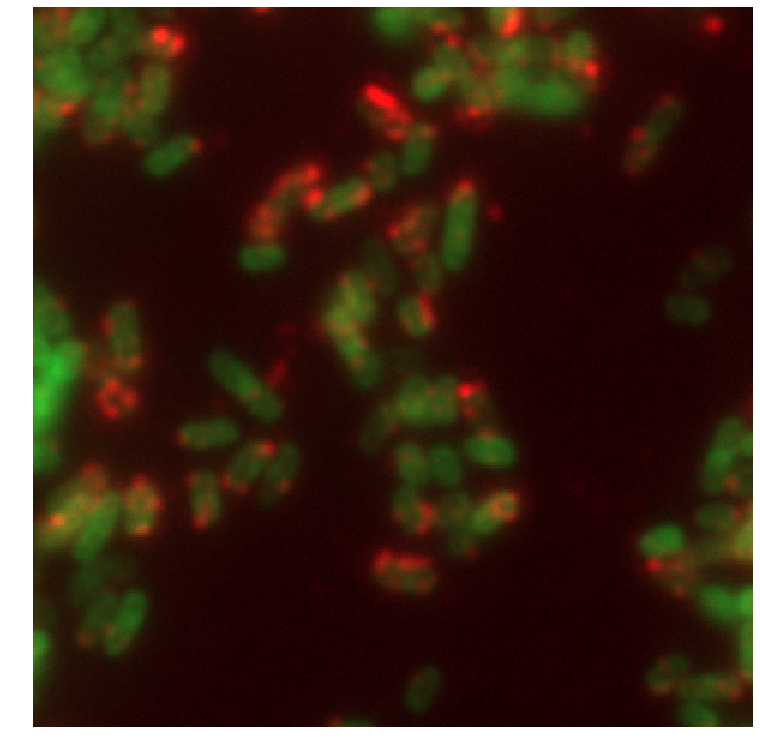

In [29]:
import matplotlib.pyplot as plt
import numpy as np

dims=(10,10)
clims=('min','max')
image=im

fig = plt.figure(figsize=(dims[0], dims[1]))
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_axis_off()
fig.add_axes(ax)
extent = 0, image.shape[1], image.shape[0], 0
zoom_coords = zc
x1, x2, y1, y2 = extent if not len(zoom_coords)==4 else zoom_coords
ulim = np.max(image) if clims[1] == 'max' else clims[1]
llim = np.min(image) if clims[0] == 'min' else clims[0]
ax.imshow(image, clim=(llim, ulim), extent=extent)           
ax.set_xlim(x1, x2)
ax.set_ylim(y2, y1)
plt.show()
plt.close()

In [42]:
dir_from_here = '../../../../../data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar'
spot_raw_fn = [czi_dir + '/' + sample_name + '_spot_raw.png']
print(os.path.exists(spot_raw_fn[0]))
imfn.gallery(spot_raw_fn, captions=[sample_name], row_height='350px')

True


In [43]:
flat_field_filename = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/'\
                        'devlaminck_widefield/'\
                        '2021_04_12_flat_field_correction_lens_100x_refl_cy5.czi'
im_obj = Image(sample_name=sample_name, illumination_names=['gfp','cy5'], 
               data_dir=dir_from_here, flat_field_filename=flat_field_filename)

In [44]:
im_obj.pick_channel('cy5')
im_obj.flat_field_correction()

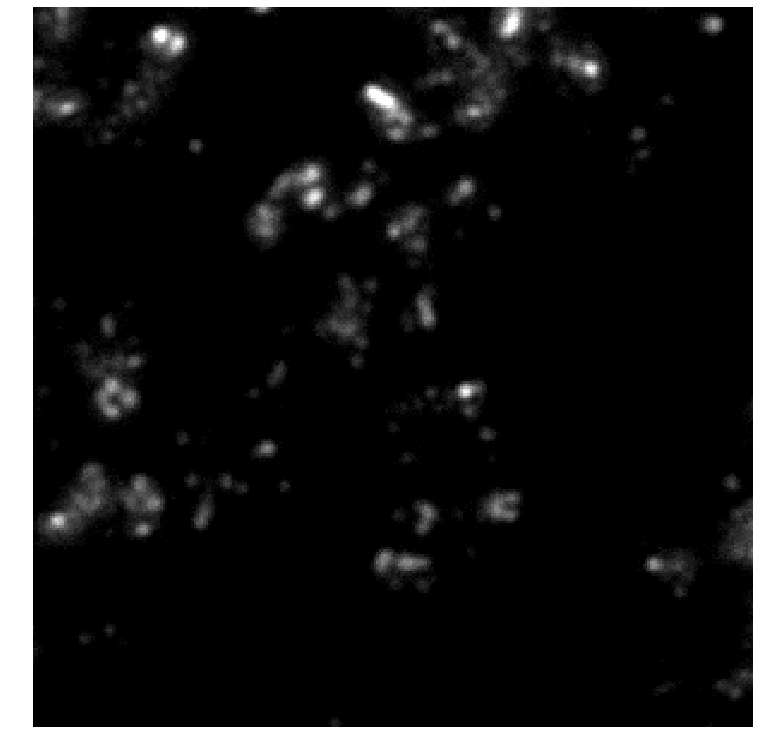

In [46]:
im_obj.save_intensity_image(image=im_obj.raw_2D, 
                            clims=(0.15,0.35), dims=(10,10), 
                            cmap='gray', save=False, zoom_coords=zc)

In [98]:
sample_name = sample_names[5]
sample_name

'2021_04_05_dnafishmethodchar_method_c_plasmid_pos_fov_1'

/home/bmg224/miniconda3/envs/hiprfish_imaging/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


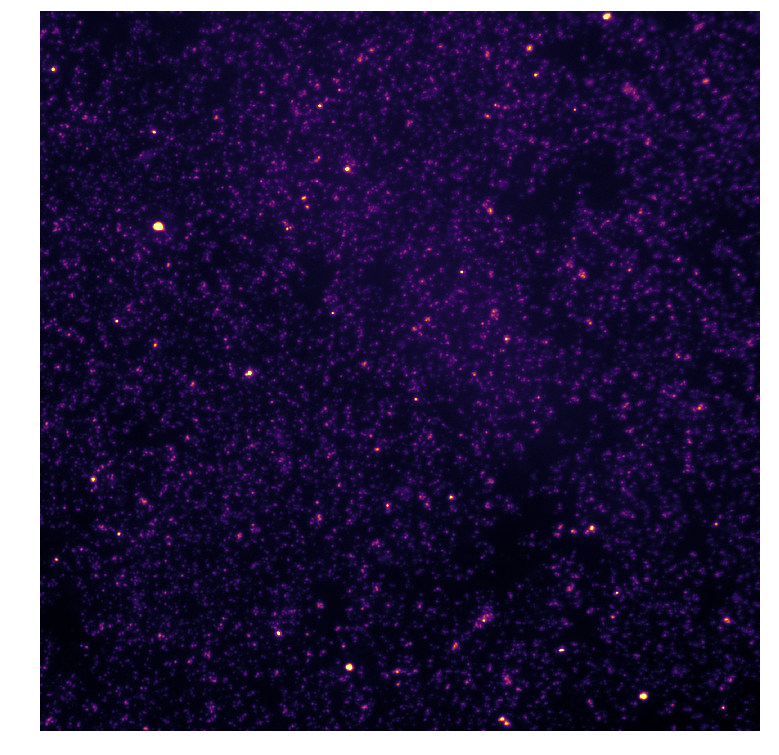

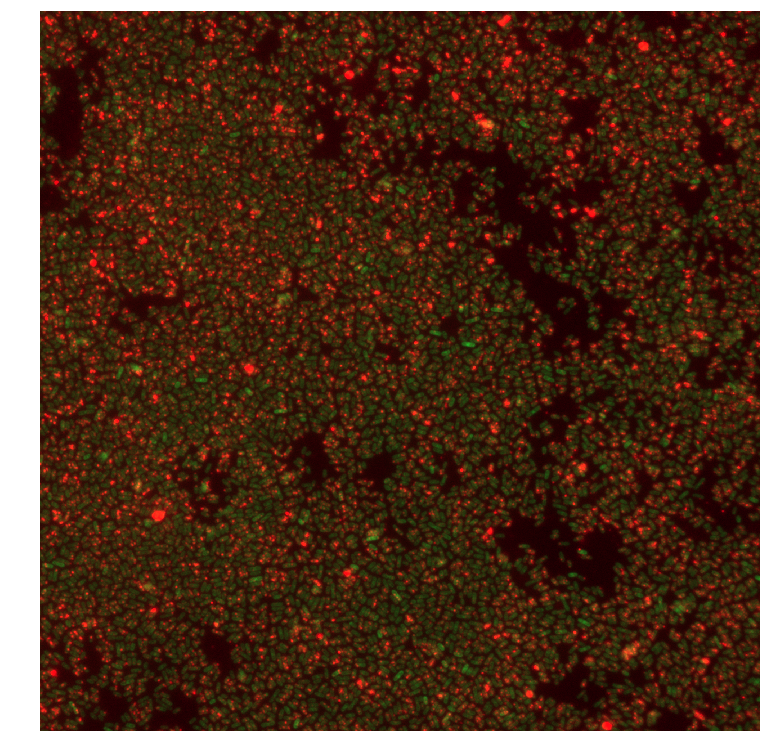

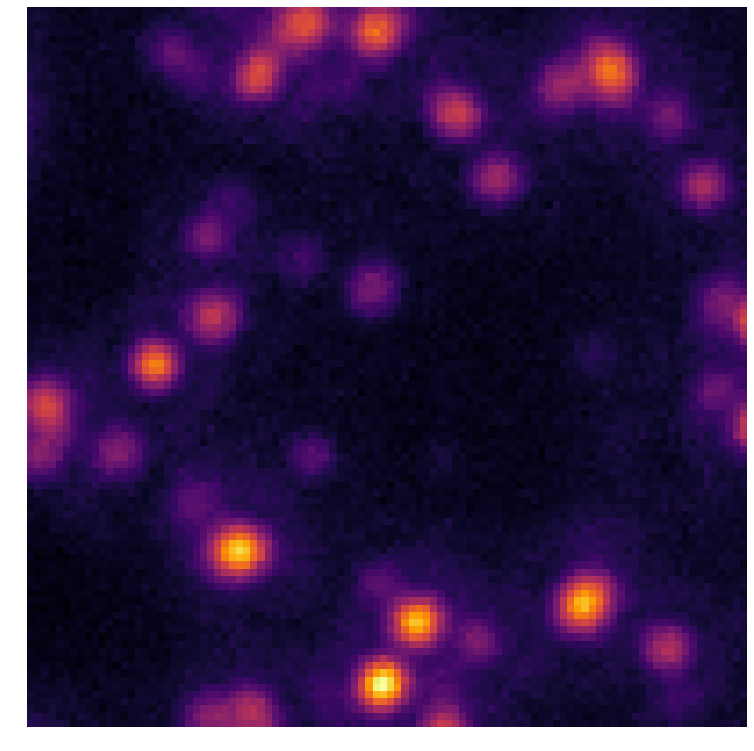

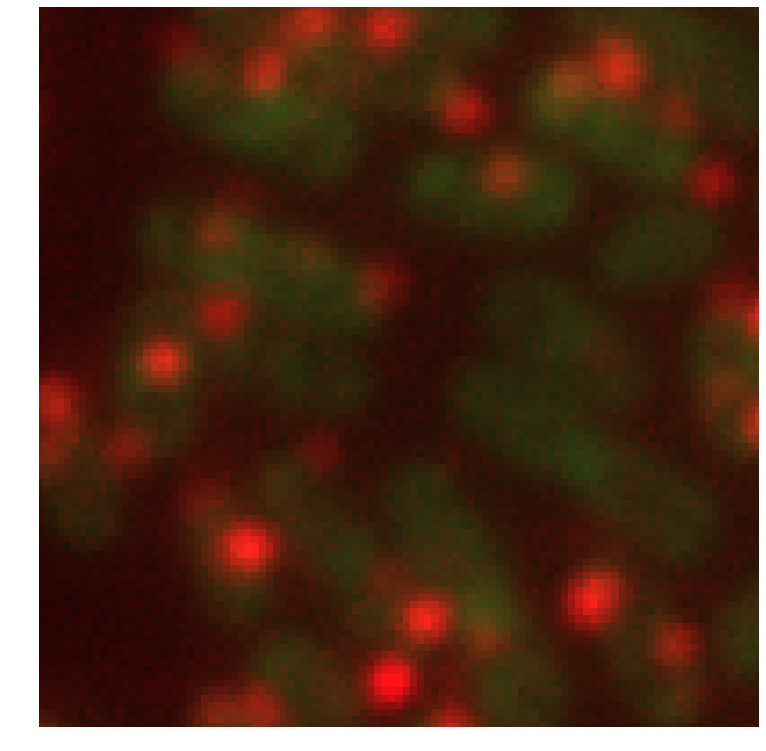

In [99]:
dims=(10,10)
# Get single channel image
raw_filename = czi_dir + '/' + sample_name + '.czi'
image = ufi.load_image(raw_filename)
im = image[:,:,1]
# show full size raw
fig, ax = ufi.plot_image(im,dims=dims)
ufi.show()
ufi.close()
# show full size rgb
rgb_filename = tiffs_dir + '/' + sample_name + tif_ext
fig, ax = ufi.plot_rgb(rgb_filename,dims=dims)
ufi.show()
ufi.close()
# get zoom region
zoom_dims=(100,100)
zm, zc = ufi.get_zoom_region(im, dims=zoom_dims)
zoom_im = im[zc[2]:zc[3],zc[0]:zc[1]]
# show raw
fig, ax = ufi.plot_image(zoom_im, dims=dims)
ufi.show()
ufi.close()
# show rgb
fig, ax = ufi.plot_rgb(rgb_filename, zoom_coords=zc, dims=dims)
ufi.show()
ufi.close()